## Word_embedding

Word embedding, bir kelime veya ifade için düz bir vektör olarak ifade edilmesidir. Bu vektörler, kelimelerin anlamları arasındaki benzerlikleri yansıtmak üzere öğrenilir. Bu sayede, yapay zeka modelleri kelimeler arasındaki ilişkileri daha iyi anlayabilir

Word embedding, metin verileri kullanılarak öğrenilir. Örneğin, bir metin corpus'u (büyük metin veritabanı) kullanılarak, her kelime için çevresindeki kelimeler ile ilişkisini öğrenir. Bu ilişki, kelime ve çevresindeki kelimeler arasındaki co-occurrence (ortak görünüm) frekansı olarak tanımlanır. Daha sonra, bu co-occurrence verileri kullanarak, her kelime için bir vektör oluşturulur. Bu vektörler, kelimelerin anlamları arasındaki benzerlikleri yansıtmak üzere tasarlanır.

Örneğin, "öğretmen", "öğrenci", "not verme" kelimeleri sıklıkla aynı metinlerde görülür ve benzer anlamlar taşır, bu nedenle oluşan vektörleri birbirine yakın olacak. Ancak "öğretmen" ve "portakal" kelimeleri sıklıkla aynı metinlerde görülmez ve farklı anlamlar taşır, bu nedenle oluşan vektörleri birbirinden uzak olacak.

## Feature Representation (Feature Extraction for word embeddings)

word embbeding vektöründe yeralan ve genellikle -1 ve +1 (Bazı pre-trained modellerde bu değer -1 ve +1'den büyük olabilir.) arasında değer alan elemanların her birine feature representation denir. Bu feature representationların model tarafından oluşturulması sürecisine ise feature extraction denir.

ML'de, feature extraction, veri kümesinde bulunan özellikleri veya nitelikleri belirlemek için kullanılan bir yöntemdir. Bu özellikler, veri kümesindeki verileri anlamlı bir şekilde ifade etmelerine olanak tanır. Bu özellikler, veri kümesinden manuel olarak seçilir.

DL'de ise, feature extraction, veri kümesindeki özellikleri öğrenmek için kullanılan bir yöntemdir. Bu yöntem için kullanılan yöntemler arasında Convolutional Neural Network (CNN) ve Recurrent Neural Network (RNN) gibi yapay sinir ağları yer almaktadır. Bu yapay sinir ağları, veri kümesinden özellikleri otomatik olarak öğrenir ve bu özellikler, veri kümesindeki verileri daha anlamlı bir şekilde ifade etmelerine olanak tanır.

Özet olarak, ML'de özellikler manuel olarak kullanıcı tarafından seçilirken, DL'de özellikler otomatik model tarafından tespit edilerek öğrenilir.

## Word2Vec

In [1]:
#!pip install gensim
# conda install -c conda-forge gensim

In [2]:
from nltk.tokenize import word_tokenize
import pandas as pd
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('newspaper.zip', names = ["news"])
df

# pandas'ın read_csv fonksiyonu zip'li dosyaları da okuyabiliyor. 
# ziplediğimiz data(corpus) txt dosyası olduğundan dosyada belirlenmiş feture ismi/isimleri belirlenmemiştir. Bu sebeple 
# feature isimlendirmesi için names parametresini kullanıyoruz.
# names parametresi kullanılmaz ise ilk satırdaki text default olarak feature names olarak atanır.

,news
0,iran devlet televizyonu ülkedeki eyaletin sind...
1,gösterilerde fitnecilere ölüm münafıklara ölüm...
2,dini lider ali hamaney ve cumhurbaşkanı mahmud...
3,musevi ye ölüm ve idam idam sloganları duyuldu
4,muhalefet liderleri kaçtı mı aşure günü yaşana...
...,...
411520,dışişleri bakanlığı ndan yapılan yazılı açıkla...
411521,açıklamada abd nin ankara büyükelçiliği ve ist...
411522,seyahat uyarısı güncelleme kararının temmuz da...
411523,amerikalı turistlerin açıkça türkiye deki ulus...


In [7]:
df.news[41]

'saydım duş almak için üç dakika yeterli ve bakın kokmuyorum da '

In [9]:
word_tokenize(df.news[41])

['saydım',
 'duş',
 'almak',
 'için',
 'üç',
 'dakika',
 'yeterli',
 've',
 'bakın',
 'kokmuyorum',
 'da']

In [10]:
corpus = []

for i in df.news:
    corpus.append(word_tokenize(i))

print(corpus[:5])

# word2vec algoritması tüm corpusun 2 boyutlu olmasını ister. Bu sebeple burdaki for döngüsü ile tüm documnetleri/satırları
# teker teker çekip word tokenlerine ayırıyoruz. Word_tokenize fonksiyonu default olarak texti word tokenlerine ayırıp bir 
# listeye atar. Bu listeler corpus listesine append edilerek corpus 2 boyutlu hale getiritir. 

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü']]


In [11]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)

# vector_size, kaç boyutlu word embeddings istiyorsak burda belirtiyoruz.
# Bir token ile diğer tokenler arasındaki anlamsal ilişkiler kurulurken bu tokenin kaç önce ve sonrasındaki tokenler dikkate 
# alınarak eğitim yapılmasını istiyorsak window parametresinde belirtiyoruz. Tavsiye edilen 5-15 sayıları arasındadır.
# min_count, corpusta 5 veya daha az geçen tokenler eğitime dahil edilmez. Genellikle 3,4,5 gibi sayılar tercih edilir.
# sg =1, eğitimi skipgram algoritması ile yap.
# sg =0, eğitimi CBOW algoritması ile yap.

In [12]:
model.wv['ankara']

# 100 elemanlı/boyutlu word_embedding

array([ 0.31081417, -0.12164167,  0.19561437,  0.41136748,  0.32842496,
        0.11194248, -0.56829304,  0.5661261 , -0.11081512, -0.36489815,
       -0.07611699, -0.6496909 , -0.41072485,  0.03208696,  0.00328285,
        0.6324867 ,  0.09752325, -0.4805997 ,  0.11841419, -1.0365313 ,
       -0.23365067,  0.37326235,  0.6060967 , -0.5856859 ,  0.08865505,
        0.2589555 , -0.14632373,  0.05221381, -0.09896757,  0.70737904,
        0.49006   ,  0.10280373,  0.0680707 , -0.50594646,  0.04187351,
       -0.31932864, -0.09711969, -0.40514132,  0.24382436, -0.40366608,
        0.2768256 ,  0.03208508,  0.5084667 , -0.05990181,  0.5464565 ,
        0.4017679 ,  0.01139939, -0.10083386,  0.06598069, -0.22588393,
        0.42154974, -0.07887193, -0.0342469 , -0.19730426, -0.1070734 ,
       -0.13766377,  0.01543441, -0.10659543, -0.37855142, -0.5384031 ,
       -0.03633417, -0.25605962,  0.3221969 ,  0.15415335, -0.769064  ,
        0.09362946,  0.07979269,  0.27179164, -0.03526044, -0.10

In [14]:
model.wv.most_similar('bıçak')

[('boynundan', 0.8018431663513184),
 ('bıçağı', 0.7906331419944763),
 ('arabasında', 0.7662729024887085),
 ('yelek', 0.765421450138092),
 ('balta', 0.7649369239807129),
 ('darbeleriyle', 0.7606822848320007),
 ('darbelerine', 0.759668231010437),
 ('morluklar', 0.7593773603439331),
 ('kılıçla', 0.7557517290115356),
 ('yelekler', 0.752866804599762)]

In [26]:
model.wv.most_similar('nur')

[('gülen', 0.9113976955413818),
 ('fetullah', 0.817703902721405),
 ('vaiz', 0.7760117650032043),
 ('elebaşı', 0.7521460652351379),
 ('gülerce', 0.6823400855064392),
 ('fuller', 0.6784144043922424),
 ('cemaati', 0.6698505282402039),
 ('dershane', 0.6651429533958435),
 ('iadesiyle', 0.6538774967193604),
 ('adl', 0.6522930860519409)]

In [11]:
model.wv.most_similar('eve')

[('evine', 0.7999204993247986),
 ('dükkana', 0.7542088627815247),
 ('apartmana', 0.7303590774536133),
 ('mağazaya', 0.7222842574119568),
 ('arabasına', 0.720339834690094),
 ('komşusunun', 0.6998159885406494),
 ('okula', 0.6950918436050415),
 ('arabaya', 0.694274365901947),
 ('karakola', 0.6926326155662537),
 ('lokantaya', 0.6886556148529053)]

In [12]:
model.wv.most_similar('mavi')

[('marmara', 0.8920373320579529),
 ('gemisine', 0.6956965327262878),
 ('baskınıyla', 0.6879400014877319),
 ('dökme', 0.6312839388847351),
 ('baskınına', 0.6210713982582092),
 ('filosundaki', 0.6163733601570129),
 ('saldırısındaki', 0.6150459051132202),
 ('filodaki', 0.6019846200942993),
 ('gemisindeki', 0.5971487760543823),
 ('baskınının', 0.5902086496353149)]

In [21]:
model.wv.most_similar(positive=['öğrenme', 'doktor'], negative=['tedavi'], topn=5)

[('dersin', 0.655022382736206),
 ('eğitimciler', 0.6529861092567444),
 ('imamlara', 0.6514789462089539),
 ('driscoll', 0.6504199504852295),
 ('eczacı', 0.6480433344841003)]

In [14]:
model.wv.most_similar(positive=['ankara', 'belçika'], negative=['brüksel'], topn=1)

[('hollanda', 0.6443963646888733)]

In [22]:
model.save("word2vec.model")

In [23]:
model = Word2Vec.load("word2vec.model")

## Glove

In [24]:
from gensim.models import KeyedVectors

# KeyedVectors fonksiyonunu farklı bir formattaki word embeddingleri word2vec formatına dönüştürmek için kullanıyoruz.

In [25]:
glove_model = 'glove.6B.100d.txt'
model2 = KeyedVectors.load_word2vec_format(glove_model, no_header=True) #'glove.6B.100d.txt'

# 'Word2Vec formatında genellikle dosyanın ilk satırında bir başlık bulunur ve bu başlık satırı, kelime sayısını
# ve vektör boyutunu içerir. Ancak txt dosyamız glove formatında olduğundan glove.txt dosyalarında başlık bulunmaz
# başlık bilgisi olmadığını no_header=True şeklinde belirtmemiz gerekir aksi taktirde hata alırsınız.

In [20]:
model2['teacher']

array([ 0.44374 ,  0.67311 , -0.51096 ,  0.20882 , -0.10662 ,  0.55098 ,
       -0.035593,  0.25126 , -0.32789 ,  1.0762  , -0.49637 , -0.4298  ,
        0.36764 ,  0.57894 , -0.25027 , -0.41021 ,  0.086998, -0.16843 ,
       -0.85764 ,  1.0404  , -1.0314  ,  0.095147,  0.30729 ,  0.12348 ,
        0.22745 , -0.52157 , -0.72478 , -1.0843  ,  0.035966,  0.62985 ,
       -1.0991  ,  0.67161 ,  0.33797 ,  0.14551 , -0.90049 , -0.064415,
       -0.75247 ,  0.21741 ,  0.51594 , -0.46291 , -0.77598 ,  0.40705 ,
        0.1889  , -0.43402 ,  0.23202 , -0.081453, -0.3882  , -0.34444 ,
        0.080225, -0.28274 , -0.38869 , -0.58152 , -0.25558 ,  1.0027  ,
       -0.11114 , -1.5402  , -0.16761 , -0.26558 ,  0.9325  ,  0.069397,
        0.96618 ,  0.15449 , -0.22905 , -0.1761  ,  0.13225 , -0.55741 ,
        0.9234  , -0.04845 ,  0.50202 ,  1.0144  , -0.1256  ,  0.30486 ,
        0.090808,  0.17642 , -0.23146 ,  0.68386 ,  0.37269 , -0.37316 ,
       -0.025728, -1.0279  , -0.33142 ,  0.036028, 

In [21]:
model2.most_similar('ankara')

[('turkey', 0.7512096762657166),
 ('istanbul', 0.6787630319595337),
 ('turkish', 0.6690374612808228),
 ('damascus', 0.6372509002685547),
 ('tbilisi', 0.6322181820869446),
 ('erdogan', 0.6258037090301514),
 ('moscow', 0.6217040419578552),
 ('brussels', 0.6181439161300659),
 ('skopje', 0.6164302825927734),
 ('cyprus', 0.6064029932022095)]

In [22]:
model2.most_similar('teacher')

[('student', 0.8083399534225464),
 ('school', 0.7545564770698547),
 ('teaching', 0.7521439790725708),
 ('taught', 0.741184651851654),
 ('teachers', 0.7291542887687683),
 ('graduate', 0.7134960293769836),
 ('instructor', 0.7077120542526245),
 ('students', 0.6828974485397339),
 ('teaches', 0.6552315354347229),
 ('education', 0.6528989672660828)]

In [23]:
model2.most_similar('doctor')

[('physician', 0.7673239707946777),
 ('nurse', 0.75215083360672),
 ('dr.', 0.7175194025039673),
 ('doctors', 0.7080884575843811),
 ('patient', 0.7074184417724609),
 ('medical', 0.6995992660522461),
 ('surgeon', 0.6905338168144226),
 ('hospital', 0.6900930404663086),
 ('psychiatrist', 0.658909797668457),
 ('dentist', 0.6447421312332153)]

In [24]:
model2.most_similar(positive=['woman', 'son'], negative=['man'], topn=1)

[('daughter', 0.9090957045555115)]

In [25]:
model2.most_similar(positive=['woman', 'father'], negative=['man'], topn=1)

[('mother', 0.9024619460105896)]

In [26]:
model2.most_similar(positive=['woman', 'uncle'], negative=['man'], topn=1)

[('aunt', 0.836803138256073)]

In [27]:
model2.most_similar(positive=['ankara', 'germany'], negative=['berlin'], topn=1)

[('turkey', 0.81471186876297)]

In [28]:
model2.most_similar(positive=['teach', 'doctor'], negative=['treat'], topn=1)

[('teacher', 0.7610154151916504)]

In [29]:
model2.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]

In [30]:
model2.most_similar(positive=['love', 'jealous'], negative=['hate'], topn=1)

[('lover', 0.7032662630081177)]

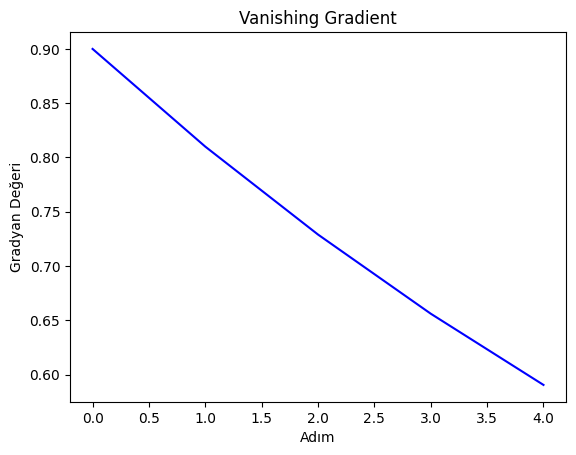

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# RNN modeli tanımlama
def rnn_model(input_sequence):
    hidden_state = 1
    gradients = []
    for i in range(len(input_sequence)):
        gradient = 0.9 * hidden_state  # Örnek olarak, gradyanın her adımda %90 oranında küçüldüğünü varsayalım
        gradients.append(gradient)
        hidden_state = gradient
    
    return gradients

# Input verisi ve RNN modelini kullanarak gradyanları hesaplama
input_sequence = [1, 2, 3, 4, 5]
gradients = rnn_model(input_sequence)

# Gradyanları görselleştirme
plt.plot(range(len(input_sequence)), gradients, 'b-')
plt.xlabel('Adım')
plt.ylabel('Gradyan Değeri')
plt.title('Vanishing Gradient')
plt.show()


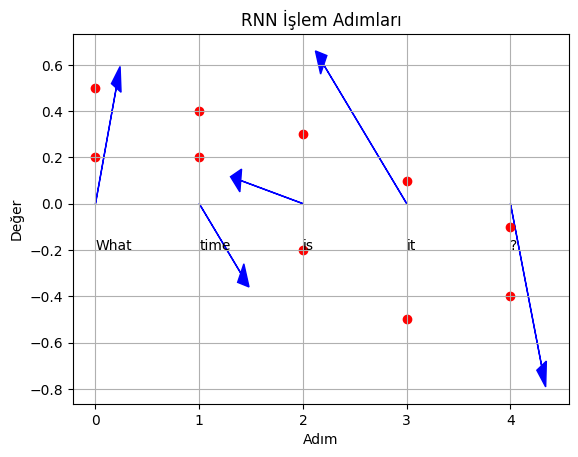

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Giriş verisi
input_sequence = ["What", "time", "is", "it", "?"]

# Gömme vektörleri
embedding_vectors = {
    "What": [0.2, 0.5, -0.1],
    "time": [0.4, -0.3, 0.8],
    "is": [-0.6, 0.1, 0.9],
    "it": [-0.8, 0.6, -0.2],
    "?": [0.3, -0.7, 0.4]
}

# Gizli durumlar
hidden_states = {
    "What": [0.2, 0.5],
    "time": [0.4, 0.2],
    "is": [-0.2, 0.3],
    "it": [0.1, -0.5],
    "?": [-0.4, -0.1]
}

# Grafik çizimi
fig, ax = plt.subplots()

for i in range(len(input_sequence)):
    word = input_sequence[i]
    vector = embedding_vectors[word]
    hidden_state = hidden_states[word]

    # Gömme vektörünü gösteren ok
    ax.arrow(i, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')

    # Gizli durumu gösteren nokta
    ax.scatter(i, hidden_state[0], color='red')
    ax.scatter(i, hidden_state[1], color='red')

    # Kelime etiketi
    ax.annotate(word, (i, -0.2))

# Eksen etiketleri
ax.set_xlabel('Adım')
ax.set_ylabel('Değer')

plt.title('RNN İşlem Adımları')
plt.grid(True)
plt.show()


In [31]:
from gensim.models import Word2Vec

# Örnek metin veri kümesi
sentences = [
    ["What", "time", "is", "it", "?"],
    ["It", "is", "time", "to", "learn", "NLP"],
    ["I", "love", "natural", "language", "processing"]
]

# Word2Vec modelini eğitme
model = Word2Vec(sentences, vector_size=3, window=2, min_count=1)

# Kelime gömme vektörlerini almak
embedding_vectors = model.wv

# Belirli bir kelimenin gömme vektörünü almak
word = "time"
vector = embedding_vectors[word]

print(f"Gömme vektörü for '{word}': {vector}")



Gömme vektörü for 'time': [ 0.3003091  -0.31009832 -0.23722696]
